<a href="https://colab.research.google.com/github/Gabriela2685/Accidentes/blob/main/prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                  251
Model:                            GLM   Df Residuals:                      246
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -362.54
Date:                Mon, 16 Dec 2024   Deviance:                       50.968
Time:                        05:39:19   Pearson chi2:                     59.7
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002373
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8616      0.085     10.081

<ipython-input-3-fbda63806ddd>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PRED_POISSON'] = poisson_model.mu
<ipython-input-3-fbda63806ddd>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AUX_OLS_DEP'] = ((df_train['acc'] - df_train['PRED_POISSON'])**2 - df_train['PRED_POISSON']) / df_train['PRED_POISSON']
<ipython-input-3-fbda63806ddd>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

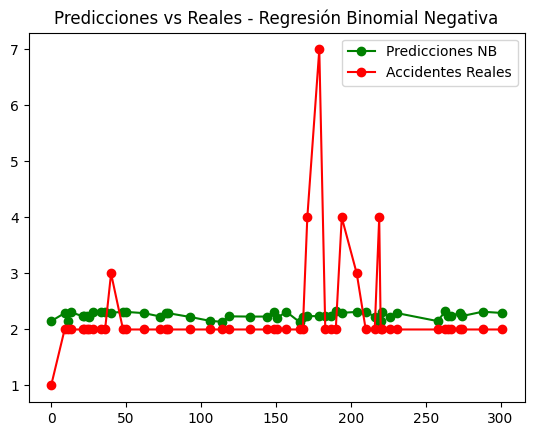

In [3]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Cargar la base de datos
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS5KjfCppKP3uNBWLSl14f4JD458yqOU8vfVbdCP1MSOwbw7TTIl6aGyInu-8BAYw/pub?output=csv', parse_dates=['fecha_evento'])

# Convertir variables categóricas en numéricas si es necesario
df['hora_pico'] = df['hora_pico'].map({'SI': 1, 'NO': 0})
df['horario'] = df['horario'].map({'DIA': 1, 'NOCHE': 0})
df['dia_1'] = df['dia_1'].map({'Entre semana': 0, 'Fin de semana': 1})

# División en datos de entrenamiento y prueba
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

# Expresión para el modelo (Poisson y Binomial Negativa)
expr = """acc ~ precipitacion + hora_pico + horario + dia_1"""

# Matrices X (independientes) e y (dependiente) con Patsy
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

# Modelo de Poisson
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

# Añadir predicciones
df_train['PRED_POISSON'] = poisson_model.mu
df_train['AUX_OLS_DEP'] = ((df_train['acc'] - df_train['PRED_POISSON'])**2 - df_train['PRED_POISSON']) / df_train['PRED_POISSON']

# Modelo auxiliar OLS para el parámetro alpha de Binomial Negativa
ols_expr = """AUX_OLS_DEP ~ PRED_POISSON - 1"""
aux_ols = smf.ols(ols_expr, df_train).fit()

# Modelo de Binomial Negativa
alpha = aux_ols.params[0]

# Calculate predictions for the test set using the Negative Binomial model
nb_predictions = nb_model.get_prediction(X_test)
nb_predictions = nb_predictions.summary_frame() # Get a DataFrame with prediction results

# Gráfica de predicciones vs valores reales
plt.plot(df_test.index, nb_predictions['mean'], 'go-', label='Predicciones NB')
plt.plot(df_test.index, y_test['acc'], 'ro-', label='Accidentes Reales')
plt.legend()
plt.title("Predicciones vs Reales - Regresión Binomial Negativa")
plt.show()

Resumen del modelo Poisson:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                  246
Model:                            GLM   Df Residuals:                      241
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -359.04
Date:                Mon, 16 Dec 2024   Deviance:                       56.509
Time:                        05:53:25   Pearson chi2:                     68.5
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0007201
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         

<ipython-input-6-dc653cbf1074>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PRED_POISSON'] = poisson_model.mu
<ipython-input-6-dc653cbf1074>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AUX_OLS_DEP'] = ((df_train['acc'] - df_train['PRED_POISSON'])**2 - df_train['PRED_POISSON']) / df_train['PRED_POISSON']


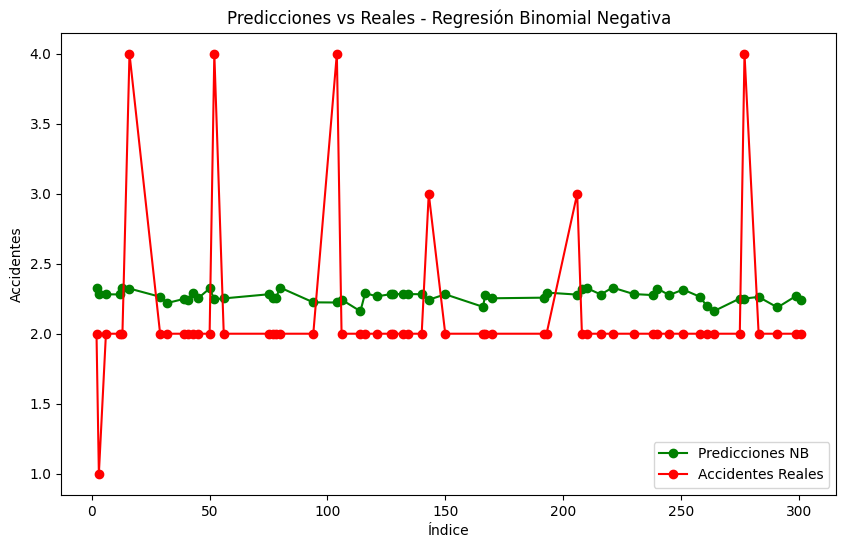

In [6]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Cargar la base de datos
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS5KjfCppKP3uNBWLSl14f4JD458yqOU8vfVbdCP1MSOwbw7TTIl6aGyInu-8BAYw/pub?output=csv',
                 parse_dates=['fecha_evento'])

# Convertir variables categóricas en numéricas
df['hora_pico'] = df['hora_pico'].map({'SI': 1, 'NO': 0})
df['horario'] = df['horario'].map({'DIA': 1, 'NOCHE': 0})
df['dia_1'] = df['dia_1'].map({'Entre semana': 0, 'Fin de semana': 1})

# División en datos de entrenamiento y prueba
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

# Expresión para el modelo (Poisson y Binomial Negativa)
expr = """acc ~ precipitacion + hora_pico + horario + dia_1"""

# Matrices X (independientes) e y (dependiente) con Patsy
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

# Modelo de Poisson
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print("Resumen del modelo Poisson:")
print(poisson_model.summary())

# Añadir predicciones al conjunto de entrenamiento
df_train['PRED_POISSON'] = poisson_model.mu
df_train['AUX_OLS_DEP'] = ((df_train['acc'] - df_train['PRED_POISSON'])**2 - df_train['PRED_POISSON']) / df_train['PRED_POISSON']

# Modelo auxiliar OLS para el parámetro alpha de Binomial Negativa
ols_expr = """AUX_OLS_DEP ~ PRED_POISSON - 1"""
aux_ols = smf.ols(ols_expr, df_train).fit()
alpha = 0.01

# Modelo de Binomial Negativa
nb_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=alpha)).fit()
print("\nResumen del modelo Binomial Negativa:")
print(nb_model.summary())

# Predicciones en el conjunto de prueba
nb_predictions = nb_model.get_prediction(X_test).summary_frame()

# Gráfica de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(df_test.index, nb_predictions['mean'], 'go-', label='Predicciones NB')
plt.plot(df_test.index, y_test['acc'], 'ro-', label='Accidentes Reales')
plt.xlabel("Índice")
plt.ylabel("Accidentes")
plt.legend()
plt.title("Predicciones vs Reales - Regresión Binomial Negativa")
plt.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                  245
Model:                            GLM   Df Residuals:                      240
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -356.51
Date:                Mon, 16 Dec 2024   Deviance:                       55.574
Time:                        05:58:33   Pearson chi2:                     68.0
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001290
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8317      0.083     10.034

<ipython-input-8-d2b9eb3fb1c9>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'PRED_POISSON'] = poisson_model.mu
<ipython-input-8-d2b9eb3fb1c9>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'AUX_OLS_DEP'] = ((df_train['acc'] - df_train['PRED_POISSON'])**2 - df_train['PRED_POISSON']) / df_train['PRED_POISSON']


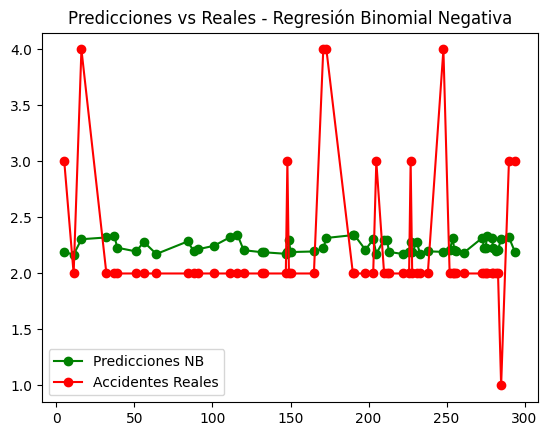

In [8]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Cargar la base de datos
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS5KjfCppKP3uNBWLSl14f4JD458yqOU8vfVbdCP1MSOwbw7TTIl6aGyInu-8BAYw/pub?output=csv', parse_dates=['fecha_evento'])

# Convertir variables categóricas en numéricas si es necesario
df['hora_pico'] = df['hora_pico'].map({'SI': 1, 'NO': 0})
df['horario'] = df['horario'].map({'DIA': 1, 'NOCHE': 0})
df['dia_1'] = df['dia_1'].map({'Entre semana': 0, 'Fin de semana': 1})

# División en datos de entrenamiento y prueba
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

# Expresión para el modelo (Poisson y Binomial Negativa)
expr = """acc ~ precipitacion + hora_pico + horario + dia_1"""

# Matrices X (independientes) e y (dependiente) con Patsy
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

# Modelo de Poisson
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

# Añadir predicciones usando .loc para evitar el warning
df_train.loc[:, 'PRED_POISSON'] = poisson_model.mu
df_train.loc[:, 'AUX_OLS_DEP'] = ((df_train['acc'] - df_train['PRED_POISSON'])**2 - df_train['PRED_POISSON']) / df_train['PRED_POISSON']

# Modelo auxiliar OLS para el parámetro alpha de Binomial Negativa
ols_expr = """AUX_OLS_DEP ~ PRED_POISSON - 1"""
aux_ols = smf.ols(ols_expr, df_train).fit()

# Modelo de Binomial Negativa
alpha = 0.01
nb_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=alpha)).fit()
print(nb_model.summary())

# Predicciones en el conjunto de prueba
nb_predictions = nb_model.get_prediction(X_test)
nb_predictions = nb_predictions.summary_frame()  # Convertir a DataFrame

# Gráfica de predicciones vs valores reales
plt.plot(df_test.index, nb_predictions['mean'], 'go-', label='Predicciones NB')
plt.plot(df_test.index, y_test['acc'], 'ro-', label='Accidentes Reales')
plt.legend()
plt.title("Predicciones vs Reales - Regresión Binomial Negativa")
plt.show()
